In [0]:
import gensim
import warnings
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [0]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']

items = beverages + countries + sports

In [0]:
item_vectors = [(item, model[item]) for item in items if item in model]

In [9]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T
tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.581543
[t-SNE] Computed conditional probabilities in 0.025s
[t-SNE] Iteration 50: error = 53.8837738, gradient norm = 0.1104347 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 54.2220764, gradient norm = 0.4576351 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 58.9917145, gradient norm = 0.2220134 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 59.2392654, gradient norm = 0.0314316 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 61.6845398, gradient norm = 0.0829533 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.684540
[t-SNE] Iteration 300: error = 0.9845629, gradient norm = 0.0008648 (50 iterations in 0.007s)
[t-SNE] Iteration 350: error = 0.8204314, gradient norm = 0.0005768 (50 i

<Figure size 1152x576 with 0 Axes>

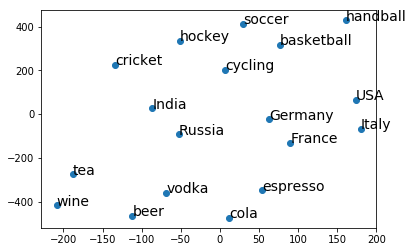

In [11]:
x=tsne[:,0]
y=tsne[:,1]
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), size=14)

plt.show()